# Part 1: Linear SVM
## Define the SVM class

In [338]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(23)
class MySVM:
    def __init__(self, C=1, lr=0.01, epochs=100):
        self.C = C
        self.lr = lr
        self.epochs = epochs
        self.w = None # weights (m x 1)
        self.b = 0 # bias 

    def _calculate_loss_and_grad(self, X_train, y_train):
        y = self.predict(X_train)
        L = y * y_train # negative values are misclassified
        hinge_loss = np.maximum(0, 1 - L) # 
        #print(f'Hinge loss: {hinge_loss}')
        net_loss = 0.5*np.dot(self.w.T, self.w) 
        #print(f'L2 reg loss: {net_loss}')
        net_loss += np.mean(hinge_loss)
        #print(f'Net loss: {net_loss}')
        # calculate gradients
        mask = (hinge_loss > 0).astype(float)
        #
        #print(f'shapes: {self.w.shape}, {mask.shape}, {y_train.shape}, {X_train.shape}')
        loss_grad = np.mean(mask * y_train * X_train, axis=0).reshape(-1,1)
        #print(f'shape of loss gradient={loss_grad.shape}')
        weight_grad = self.w - self.C*loss_grad
        #print(f'shape of weight gradient={weight_grad.shape}')
        bias_grad = -self.C*np.mean(mask * y_train)
        return net_loss, weight_grad, bias_grad

    def fit(self, X_train, y_train):
        self.w = np.random.rand(X_train.shape[1],1) - 0.5
        #self.w /= np.linalg.norm(self.w)
        self.b = np.random.rand()
        print(f'Shape of X_train, y_train: {X_train.shape}, {y_train.shape}')
        print(f'Shape of weights: {self.w.shape}')
        
        for i in range(self.epochs):
            net_loss, weight_grad, bias_grad = self._calculate_loss_and_grad(X_train, y_train)
            #print(f'Epoch {i}: net_loss={net_loss}, weight_grad={weight_grad}')
            self.w -= self.lr*weight_grad
            #self.w /= np.linalg.norm(self.w)
            self.b -= self.lr*bias_grad
            #print(f'Epoch {i}: weight={self.w}, bias={self.b}')
            if i%(self.epochs//10) == 0:
                print(f'Epoch {i}: Net loss={net_loss}')

    def predict(self, X_test):
        return np.dot(X_test, self.w) + self.b

    def get_boundary(self, X):
        if self.w.shape[0] != 2: raise ValueError(f'weights are in shape: {self.w.shape}')
        boundary = -self.b/self.w[1,0] - X*self.w[0,0]/self.w[1,0]
        return boundary, boundary + 1/self.w[1,0], boundary - 1/self.w[1,0]

    def get_boundary_plane(self, X, Y):
        if self.w.shape[0] != 3: raise ValueError(f'weights are in shape: {self.w.shape}')
        boundary = -self.b/self.w[2,0] - X*self.w[0,0]/self.w[2,0] - Y*self.w[1,0]/self.w[2,0]
        return boundary, boundary + 1/self.w[2,0], boundary - 1/self.w[2,0]


def plot_dataset(X,y, svm=None, title='Complete dataset', ylabel='Feature2'):
    label1=None
    label2=None
    for i in range(len(y)):
        label = None
        if y[i] > 0: 
            color = 'b'
            if label1 is None:
                label1=True
                label = '1'

        else:
            color = 'r'
            if label2 is None:
                label2=True
                label = '-1'
        alpha = 1
        if np.abs(y[i]) < 1:
            alpha=0.4
        plt.scatter(X[i,0], X[i,1], color=color, label=label, alpha = alpha)
    plt.xlabel('Feature1')
    plt.ylabel(ylabel)

    # Plot the SVM decision boundary
    if svm is not None:
        xmin, xmax = np.min(X[:,[0]]), np.max(X[:,[0]])
        xsteps = np.linspace(xmin, xmax, 100)
        ysteps, ysteps_u, ysteps_l = svm.get_boundary(xsteps)
        plt.plot(xsteps, ysteps, linewidth=2)
        plt.plot(xsteps, ysteps_u, linestyle='dashed', color='b')
        plt.plot(xsteps, ysteps_l, linestyle='dashed', color='r')

    #plt.legend()
    plt.title(title)
    plt.show()


## Load dataset-1

Shape of X, y: (200, 2), (200, 1)


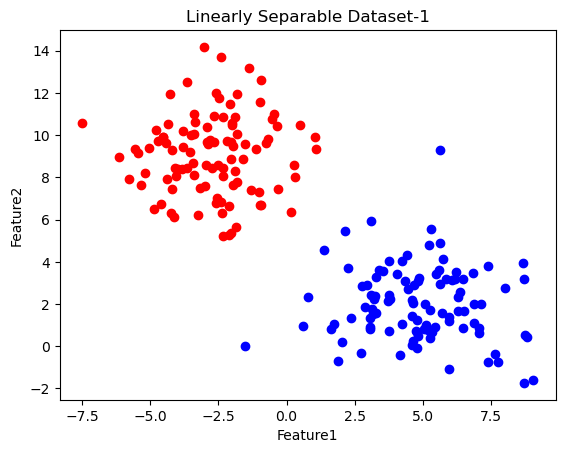

In [339]:

dataset = pd.read_csv('SVM_class1.csv').to_numpy()[:,1:]
X, y = dataset[:,:-1], dataset[:,-1:]
print(f'Shape of X, y: {X.shape}, {y.shape}')
plot_dataset(X,y, title='Linearly Separable Dataset-1')

## Run SVM on dataset-1 and test it

Shape of X_train, y_train: (160, 2), (160, 1)
Shape of X_train, y_train: (160, 2), (160, 1)
Shape of weights: (2, 1)
Epoch 0: Net loss=[[2.99157226]]
Epoch 1000: Net loss=[[0.09776245]]
Epoch 2000: Net loss=[[0.09160625]]
Epoch 3000: Net loss=[[0.09100946]]
Epoch 4000: Net loss=[[0.09074527]]
Epoch 5000: Net loss=[[0.09060251]]
Epoch 6000: Net loss=[[0.09056946]]
Epoch 7000: Net loss=[[0.09053978]]
Epoch 8000: Net loss=[[0.09051224]]
Epoch 9000: Net loss=[[0.09048634]]

=== Training accuracy score = 1.0000


=== Testing accuracy score = 1.0000



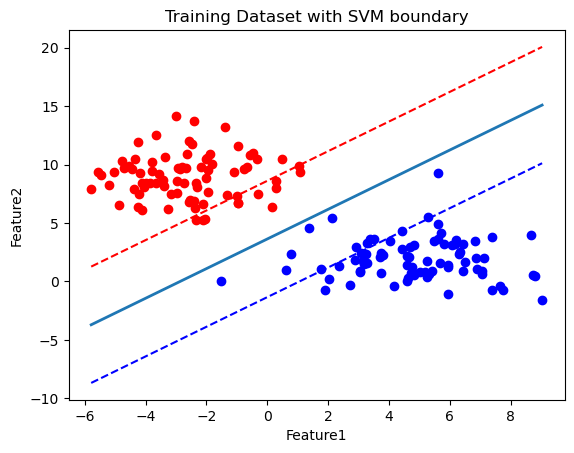

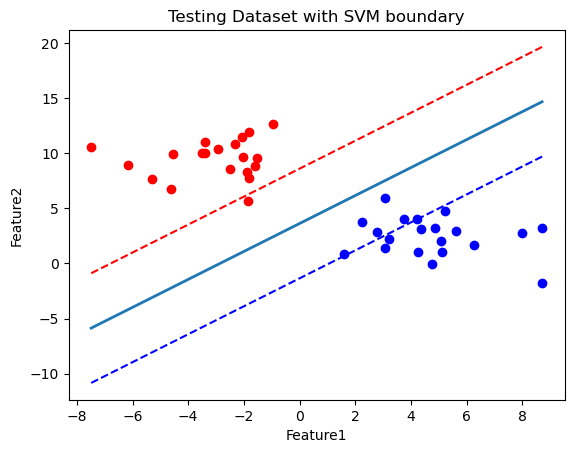

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23)
print(f'Shape of X_train, y_train: {X_train.shape}, {y_train.shape}')
svm = MySVM(epochs=10000, lr=0.0002)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_train)
score = accuracy_score(y_pred>0, y_train>0)
print(f'\n=== Training accuracy score = {score:.4f}\n')

y_pred = svm.predict(X_test)
score = accuracy_score(y_pred>0, y_test>0)
print(f'\n=== Testing accuracy score = {score:.4f}\n')
plot_dataset(X_train, y_train, svm, 'Training Dataset with SVM boundary')
plot_dataset(X_test, y_test, svm, 'Testing Dataset with SVM boundary')

# Part 2. Non-linear dataset

## 3D visualiation function

In [341]:

def plot_3d_dataset(X,y, svm=None, zlabel=r'R$^2$ = F1$^2$ + F2$^2$', title='Complete dataset'):
    fig = plt.figure(figsize=(6,6)) 
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Feature1')
    ax.set_ylabel('Feature2')
    ax.set_zlabel(zlabel)
    
    for i in range(len(y)):
        if y[i] > 0: 
            color = 'b'
        else:
            color = 'r'
        alpha = 1
        ax.scatter(X[i,0], X[i,1], X[i,2], color=color, alpha = alpha)

    # Plot the SVM decision boundary
    if svm is not None:
        xmin, xmax = np.min(X[:,[0]]), np.max(X[:,[0]])
        ymin, ymax = np.min(X[:,[1]]), np.max(X[:,[1]])
        xsteps = np.linspace(xmin, xmax, 25)
        ysteps = np.linspace(ymin, ymax, 25)
        XST, YST = np.meshgrid(xsteps, ysteps)
        zsteps, zsteps_u, zsteps_l = svm.get_boundary_plane(XST, YST)
        ax.contourf(XST, YST, zsteps, alpha=0.6, colors='g')
        ax.contourf(XST, YST, zsteps_u, alpha=0.1, colors='b')
        ax.contourf(XST, YST, zsteps_l, alpha=0.1, colors='r')

    #plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()


## Load and plot non-linear classification data

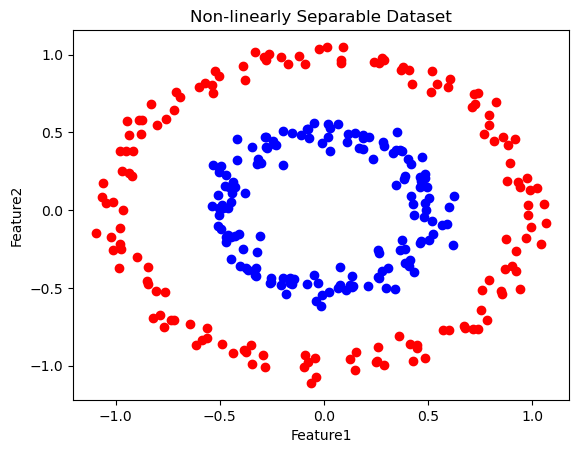

Shape of X, y: (300, 3), (300, 1)


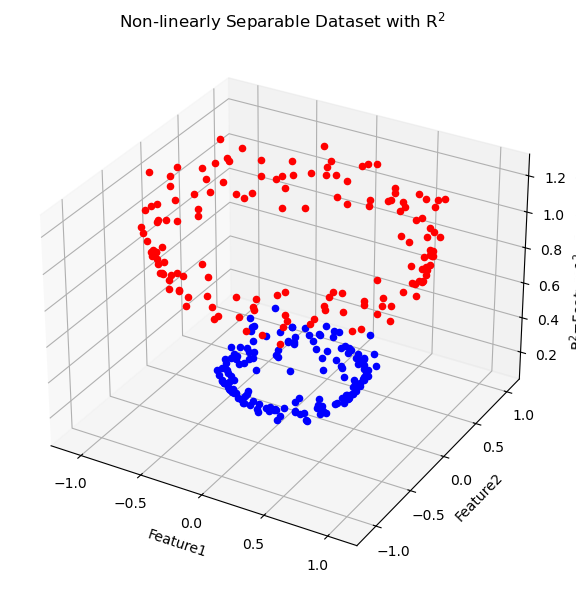

In [342]:

nldataset = pd.read_csv('SVM_class1_nonlinear.csv').to_numpy()[:,1:]
nlX, nly = nldataset[:,:-1], nldataset[:,-1:]
plot_dataset(nlX, nly, title=r'Non-linearly Separable Dataset') 

# Add a new feature : R^2 = Feature1^2 + Feature2^2
r2 = nlX[:,0:1]**2 + nlX[:,1:2]**2
nlX = np.hstack((nlX,r2))
print(f'Shape of X, y: {nlX.shape}, {nly.shape}')
#plot_dataset(np.hstack((nlX[:,0:1],nlX[:,2:3])), nly, title=r'Non-linearly Separable Dataset with R$^2$', ylabel=r'R$^2$=Feature1$^2$+Feature2$^2$') 
plot_3d_dataset(nlX, nly, title=r'Non-linearly Separable Dataset with R$^2$', zlabel=r'R$^2$=Feature1$^2$+Feature2$^2$') 

#print(np.hstack((nlX, nly)))

## Train and test SVM on non-linear classification dataset

Shape of X, y: (300, 3), (300, 1)
Shape of X_train, y_train: (240, 3), (240, 1)
Shape of X_train, y_train: (240, 3), (240, 1)
Shape of weights: (3, 1)
Epoch 0: Net loss=[[1.14600312]]
Epoch 1000: Net loss=[[4.73063613]]
Epoch 2000: Net loss=[[5.43887809]]
Epoch 3000: Net loss=[[5.55503905]]
Epoch 4000: Net loss=[[5.59833489]]
Epoch 5000: Net loss=[[5.61566617]]
Epoch 6000: Net loss=[[5.62770571]]
Epoch 7000: Net loss=[[5.63794268]]
Epoch 8000: Net loss=[[5.64662789]]
Epoch 9000: Net loss=[[5.65404092]]

=== Training accuracy score = 1.0000


=== Testing accuracy score = 1.0000



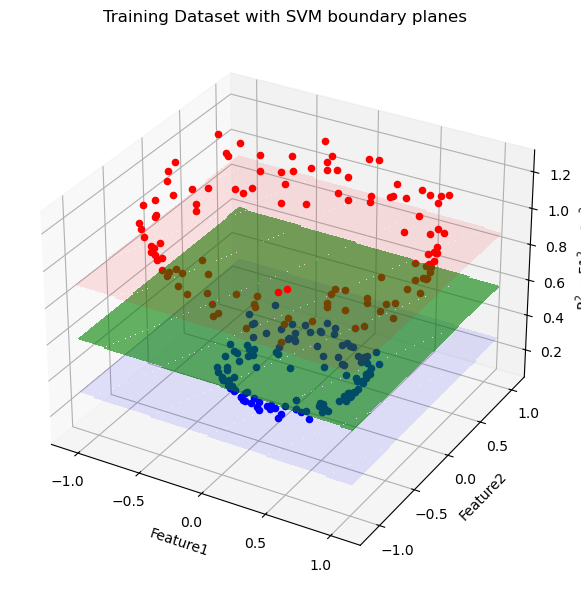

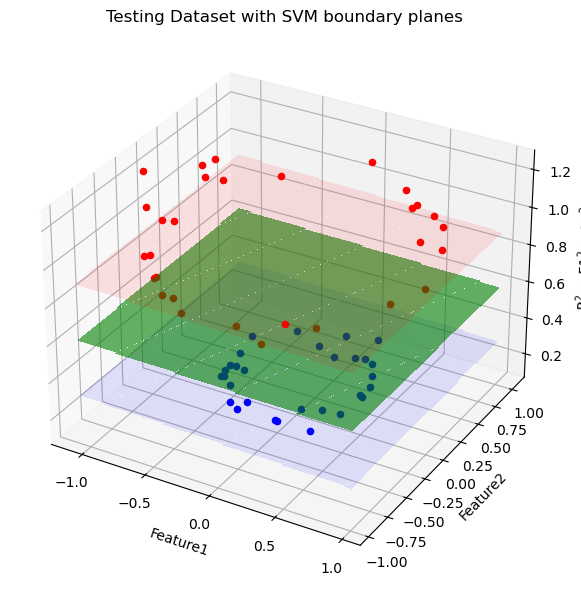

In [343]:
print(f'Shape of X, y: {nlX.shape}, {nly.shape}')
nlX_train, nlX_test, nly_train, nly_test = train_test_split(nlX, nly, test_size=0.2, stratify=nly, random_state=23)
#nlX_train = nlX_train[:, 1:]
#nlX_test = nlX_test[:, 1:]
print(f'Shape of X_train, y_train: {nlX_train.shape}, {nly_train.shape}')
nlsvm = MySVM(epochs=10000, lr=0.0002, C=100)
nlsvm.fit(nlX_train, nly_train)

nly_pred = nlsvm.predict(nlX_train)
score = accuracy_score(nly_pred>0, nly_train>0)
print(f'\n=== Training accuracy score = {score:.4f}\n')

nly_pred = nlsvm.predict(nlX_test)
score = accuracy_score(nly_pred>0, nly_test>0)
print(f'\n=== Testing accuracy score = {score:.4f}\n')
plot_3d_dataset(nlX_train, nly_train, nlsvm, title='Training Dataset with SVM boundary planes')
plot_3d_dataset(nlX_test, nly_test, nlsvm, title='Testing Dataset with SVM boundary planes')

## 2-D projection of SVM boundary

/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_3594/4161575333.py:20: RuntimeWarning: invalid value encountered in sqrt
  y_rev = np.sqrt(zsteps - XST**2)
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_3594/4161575333.py:23: RuntimeWarning: invalid value encountered in sqrt
  x_rev = np.sqrt(zsteps - YST**2)
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_3594/4161575333.py:27: RuntimeWarning: invalid value encountered in sqrt
  y_rev = np.sqrt(zsteps_u - XST**2)
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_3594/4161575333.py:30: RuntimeWarning: invalid value encountered in sqrt
  x_rev = np.sqrt(zsteps_u - YST**2)
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_3594/4161575333.py:34: RuntimeWarning: invalid value encountered in sqrt
  y_rev = np.sqrt(zsteps_l - XST**2)
/var/folders/wz/tf9bd1d17kxcg2r9f2875tv00000gn/T/ipykernel_3594/4161575333.py:37: RuntimeWarning: invalid value encountered in sqrt
  x_rev = np.sqrt(zsteps_l 

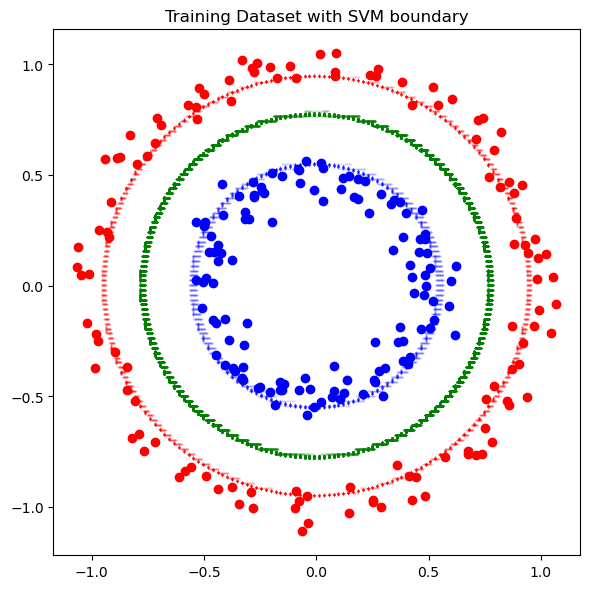

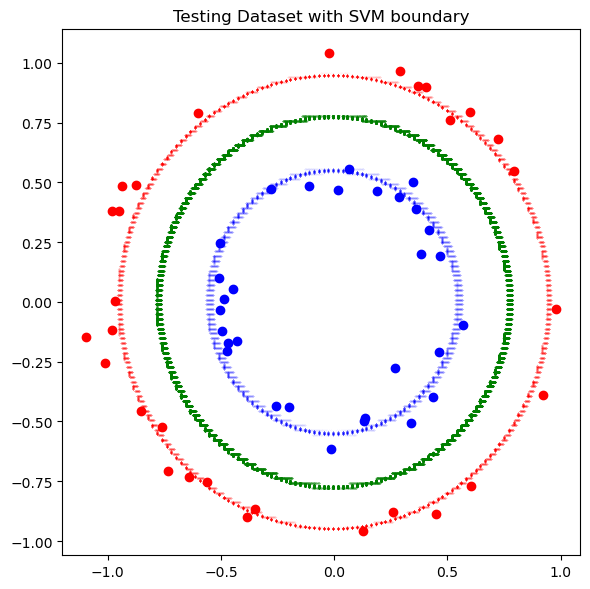

In [ ]:

def plot_2d_projection(X,y, svm=None, zlabel=r'R$^2$ = F1$^2$ + F2$^2$', title='Complete dataset'):
    fig = plt.figure(figsize=(6,6)) 
    
    for i in range(len(y)):
        if y[i] > 0: 
            color = 'b'
        else:
            color = 'r'
        alpha = 1
        plt.scatter(X[i,0], X[i,1], color=color, alpha = alpha)

    # Plot the SVM decision boundary
    if svm is not None:
        xmin, xmax = np.min(X[:,[0]]), np.max(X[:,[0]])
        ymin, ymax = np.min(X[:,[1]]), np.max(X[:,[1]])
        xsteps = np.linspace(xmin, xmax, 100)
        ysteps = np.linspace(ymin, ymax, 100)
        XST, YST = np.meshgrid(xsteps, ysteps)
        zsteps, zsteps_u, zsteps_l = svm.get_boundary_plane(XST, YST)
        y_rev = np.sqrt(zsteps - XST**2)
        plt.scatter(XST, y_rev, color='g', s=0.1)
        plt.scatter(XST, -y_rev, color='g', s=0.1)
        x_rev = np.sqrt(zsteps - YST**2)
        plt.scatter(x_rev, YST, color='g', marker='.', s=0.1, label='Decision boundary')
        plt.scatter(-x_rev, YST, color='g', marker='.', s=0.1)

        y_rev = np.sqrt(zsteps_u - XST**2)
        plt.scatter(XST, y_rev, color='b', marker='.', alpha=0.1, s=0.1, label='Margin')
        plt.scatter(XST, -y_rev, color='b', marker='.', alpha=0.1, s=0.1)
        x_rev = np.sqrt(zsteps_u - YST**2)
        plt.scatter(x_rev, YST, color='b', marker='.', alpha=0.1, s=0.1)
        plt.scatter(-x_rev, YST, color='b', marker='.', alpha=0.1, s=0.1)

        y_rev = np.sqrt(zsteps_l - XST**2)
        plt.scatter(XST, y_rev, color='r', marker='.', alpha=0.1, s=0.1, label='Margin')
        plt.scatter(XST, -y_rev, color='r', marker='.', alpha=0.1, s=0.1)
        x_rev = np.sqrt(zsteps_l - YST**2)
        plt.scatter(x_rev, YST, color='r', marker='.', alpha=0.1, s=0.1)
        plt.scatter(-x_rev, YST, color='r', marker='.', alpha=0.1, s=0.1)

        #plt.contour(XST, YST, zsteps, alpha=0.6, colors='g')
        #plt.contour(XST, YST, zsteps_u, alpha=0.1, colors='b')
        #plt.contour(XST, YST, zsteps_l, alpha=0.1, colors='r')

    #plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_2d_projection(nlX_train, nly_train, nlsvm, title='Training Dataset with SVM boundary')
plot_2d_projection(nlX_test, nly_test, nlsvm, title='Testing Dataset with SVM boundary')